Exercício 3 - DISRUPTIVE ARCHITECTURES: IOT, IOB & IA

2TDSPS

96409 - Leonardo Guimarães de Lima Marques

97385 - José Carlos da Silva

97569 - Maria Luiza de Goveia Lima

96906 - Mariana Marques Sabio

96881 - Vinícius de Abreu Pena

In [49]:
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo
!pip install ucimlrepo

In [ ]:
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)


X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets


print(breast_cancer_wisconsin_diagnostic.metadata)


print(breast_cancer_wisconsin_diagnostic.variables)


In [51]:
# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# Padronizando os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [41]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [42]:
# Construindo o modelo de rede neural
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [43]:
# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
# Treinando o modelo
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
15/15 [==============================] - 1s 19ms/step - loss: 0.7131 - accuracy: 0.5736 - val_loss: 0.5194 - val_accuracy: 0.8860
Epoch 2/20
15/15 [==============================] - 0s 5ms/step - loss: 0.6113 - accuracy: 0.6967 - val_loss: 0.4196 - val_accuracy: 0.9386
Epoch 3/20
15/15 [==============================] - 0s 5ms/step - loss: 0.5026 - accuracy: 0.7538 - val_loss: 0.3458 - val_accuracy: 0.9386
Epoch 4/20
15/15 [==============================] - 0s 4ms/step - loss: 0.4674 - accuracy: 0.7956 - val_loss: 0.2876 - val_accuracy: 0.9386
Epoch 5/20
15/15 [==============================] - 0s 4ms/step - loss: 0.4390 - accuracy: 0.8176 - val_loss: 0.2442 - val_accuracy: 0.9561
Epoch 6/20
15/15 [==============================] - 0s 4ms/step - loss: 0.3767 - accuracy: 0.8264 - val_loss: 0.2107 - val_accuracy: 0.9561
Epoch 7/20
15/15 [==============================] - 0s 4ms/step - loss: 0.3828 - accuracy: 0.8330 - val_loss: 0.1853 - val_accuracy: 0.9649
Epoch 8/20
15/15 [=

In [45]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"A precisão do modelo nos dados de teste é: {accuracy * 100:.2f}%")

4/4 [==============================] - 0s 5ms/step - loss: 0.0623 - accuracy: 0.9825
A precisão do modelo nos dados de teste é: 98.25%


In [53]:
import matplotlib.pyplot as plt

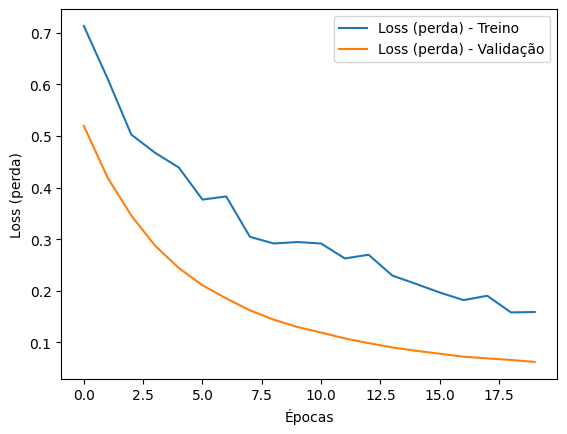

In [54]:
# Plotando a curva de perda durante o treinamento
plt.plot(history.history['loss'], label='Loss (perda) - Treino')
plt.plot(history.history['val_loss'], label='Loss (perda) - Validação')
plt.xlabel('Épocas')
plt.ylabel('Loss (perda)')
plt.legend()
plt.show()

In [47]:
# Fazendo previsões
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Matriz de Confusão:")
print(conf_matrix)from sklearn.metrics import classification_report, confusion_matrix

# Relatório de Classificação
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_classes))

4/4 [==============================] - 0s 4ms/step
Matriz de Confusão:
[[70  1]
 [ 1 42]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Analisando os resultados, podemos verificar que a precisão média é de 98,2%, sendo bem alta, demonstrando uma solidez em resultados, indicando que é um modelo de bom desempenho para identificar as amostras de cancer de mama. De acordo com as métricas ainda é possível verificar que só houve um Falso positivo e um Falso negativo.